In [ ]:
# Homework 6 Template
# G. Besla & R. Li

In [2]:
# import modules
import numpy as np
import astropy.units as u
from astropy.constants import G

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# my modules
from ReadFile import Read
# Step 1: modify CenterOfMass so that COM_P now takes a parameter specifying 
# by how much to decrease RMAX instead of a factor of 2
from CenterOfMass2 import CenterOfMass



In [44]:
def OrbitCOM(galaxy, start, end, n):
    """function that loops over all the desired snapshots to compute the COM pos and vel as a function of time.
    inputs:
    galaxy: the name of the galaxy
    start: the first snapshot number
    end: the last snapshot number
    n: an integer indicating the intervals over which you will return the COM
          
    outputs: 
    returns the time and COM position and velocity vectors of a given galaxy in each snapshot
    and save the output in a file.
    """
    
    # compose the filename for output
    fileout = f"Orbit_{galaxy}.txt"
    #  set tolerance and VolDec for calculating COM_P in CenterOfMass
    delta = 0.1
    # for M33 that is stripped more, use different values for VolDec
    if galaxy == 'M33':
        volDec = 4
    else:
        volDec = 2  
    
    # generate the snapshot id sequence 
    snap_ids = np.arange(start, end+n, n)
    # it is always a good idea to also check if the input is eligible (not required)
    if len(snap_ids) == 0:
        raise ValueError("Snapshot list empty")
    

    # initialize the array for orbital info: t, x, y, z, vx, vy, vz of COM
    
    orbit = np.zeros([len(snap_ids), 7])

    #setiing a for loop 
    for i, snap_id in enumerate(snap_ids): # loop over files
        
        # compose the data filename (be careful about the folder)
        ilbl = "000"+ str(snap_id)
        # remove all but the last 3 digits
        ilbl = ilbl[-3:]
        filename= f"/Users/swapnaneeldey/Desktop/ASTR400Bfiles/{galaxy}/%s_"%(galaxy) + ilbl + '.txt'
        # Initialize an instance of CenterOfMass class, using disk particles
        COM = CenterOfMass(filename, 2)
        # Store the COM pos and vel. Remember that now COM_P required VolDec
        COM_p =  COM.COM_P(0.1, volDec=volDec)
        COM_v =  COM.COM_V(COM_p[0],COM_p[1], COM_p[2])
        
        # store the time, pos, vel in it         h element of the orbit array,  without units (.value)
        orbit[:,0][i] = COM.time.value/1000
        #storing x,y,z components of COM position
        orbit[:,1][i] = COM_p[0].value
        orbit[:,2][i] = COM_p[1].value
        orbit[:,3][i] = COM_p[2].value
        #storing x,y,z components of COM velocity
        orbit[:,4][i] = COM_v[0].value
        orbit[:,5][i] = COM_v[1].value
        orbit[:,6][i] = COM_v[2].value
        # note that you can store 
        # a[i] = var1, *tuple(array1)

        
        # print snap_id to see the progress
        print(snap_id)
        
    # write the data to a file
    # we do this because we don't want to have to repeat this process 
    # this code should only have to be called once per galaxy.
    np.savetxt(fileout, orbit, fmt = "%11.3f"*7, comments='#',
               header="{:>10s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}"\
                      .format('t', 'x', 'y', 'z', 'vx', 'vy', 'vz'))

In [70]:
# Recover the orbits and generate the COM files for each galaxy
# read in 800 snapshots in intervals of n=5
# Note: This might take a little while - test your code with a smaller number of snapshots first! 
OrbitCOM("MW", 0, 800, 5)
OrbitCOM("M31", 0, 800, 5)
OrbitCOM("M33", 0, 800, 5)

0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295
300
305
310
315
320
325
330
335
340
345
350
355
360
365
370
375
380
385
390
395
400
405
410
415
420
425
430
435
440
445
450
455
460
465
470
475
480
485
490
495
500
505
510
515
520
525
530
535
540
545
550
555
560
565
570
575
580
585
590
595
600
605
610
615
620
625
630
635
640
645
650
655
660
665
670
675
680
685
690
695
700
705
710
715
720
725
730
735
740
745
750
755
760
765
770
775
780
785
790
795
800
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295
300
305
310
315
320
325
330
335
340
345
350
355
360
365
370
375
380
385
390
395
400
405
410
415
420
425
430
435
440
445
450
455
460
465
470
475
480
485
490
495


In [71]:
# Read in the data files for the orbits of each galaxy that you just created
# headers:  t, x, y, z, vx, vy, vz
# using np.genfromtxt
MW = np.genfromtxt("Orbit_MW.txt", comments='#', names=True)
M31 = np.genfromtxt("Orbit_M31.txt", comments='#', names=True)
M33 = np.genfromtxt("Orbit_M33.txt", comments='#', names=True)



In [72]:
MW["x"]

array([-2.0800e+00, -1.8200e+00, -1.9000e+00, -2.1600e+00, -2.4500e+00,
       -2.7900e+00, -3.3300e+00, -3.5700e+00, -3.6700e+00, -3.9500e+00,
       -4.0900e+00, -4.4600e+00, -5.1300e+00, -5.9200e+00, -6.5600e+00,
       -6.9400e+00, -7.4500e+00, -7.6800e+00, -8.6700e+00, -9.4000e+00,
       -9.9900e+00, -1.0780e+01, -1.1570e+01, -1.2410e+01, -1.3330e+01,
       -1.4150e+01, -1.5250e+01, -1.6690e+01, -1.8230e+01, -1.9840e+01,
       -2.1250e+01, -2.2640e+01, -2.4220e+01, -2.5930e+01, -2.7620e+01,
       -2.9420e+01, -3.1120e+01, -3.3120e+01, -3.5000e+01, -3.6910e+01,
       -3.9100e+01, -4.1230e+01, -4.3060e+01, -4.5410e+01, -4.7660e+01,
       -4.9650e+01, -5.2290e+01, -5.5290e+01, -5.8470e+01, -6.1670e+01,
       -6.4650e+01, -6.7790e+01, -7.0860e+01, -7.4050e+01, -7.6970e+01,
       -7.8630e+01, -7.6710e+01, -7.1240e+01, -6.4430e+01, -5.8650e+01,
       -5.3660e+01, -4.9110e+01, -4.4710e+01, -4.0550e+01, -3.6460e+01,
       -3.2660e+01, -2.9010e+01, -2.5430e+01, -2.1880e+01, -1.85

In [73]:
# function to compute the magnitude of the difference between two vectors 
# You can use this function to return both the relative position and relative velocity for two 
# galaxies over the entire orbit  
def relative_mag(galaxy_1, galaxy_2):
    """Calculate the relative position and relative velocity of the galaxies
    
    Inputs:
    galaxy_1: the name of the first galaxy
    galaxy_2: the name of the second galaxy     
    
    Returns:
    relative_position: the relative position of the two galaxies
    relative_velocity: the relative velocity of the two galaxies
    """
    # Calculate the relative position and relative velocity of the two galaxies
    relative_position = np.sqrt((galaxy_1["x"] - galaxy_2["x"])**2 + (galaxy_1["y"] - galaxy_2["y"])**2 + (galaxy_1["z"] - galaxy_2["z"])**2)
    relative_velocity = np.sqrt((galaxy_1["vx"] - galaxy_2["vx"])**2 + (galaxy_1["vy"] - galaxy_2["vy"])**2 + (galaxy_1["vz"] - galaxy_2["vz"])**2)

    return relative_position, relative_velocity

    


In [74]:
# Determine the magnitude of the relative position and velocities 

# of MW and M31
rel_pos_MW_M31, rel_vel_MW_M31 = relative_mag(MW, M31)

# of M33 and M31
rel_pos_M33_M31, rel_vel_M33_M31 = relative_mag(M33, M31)

In [75]:
plt.rcParams.update({
    "font.family": "DejaVu Serif",   # specify font family here
    "font.serif": ["cm"],
    "mathtext.fontset" : "dejavuserif" ,
    "font.size":17,
    "axes.titlesize" : 20,
    "axes.labelsize" : 20,
    "axes.linewidth" : 1.5,
    "lines.linewidth" : 2.0,
    "xtick.labelsize" :15,
    "ytick.labelsize" : 15,
    "xtick.major.size" : 15,
    "xtick.minor.size" : 0,
    "ytick.major.size" : 15,
    "ytick.minor.size" : 0,
    "xtick.major.width" : 2,
    "xtick.minor.width" : 2,
    "ytick.major.width" : 2,
    "ytick.minor.width" : 2})  
plt.rcParams["legend.frameon"] = True
fig= plt.figure(figsize=(10,8))


<Figure size 1000x800 with 0 Axes>

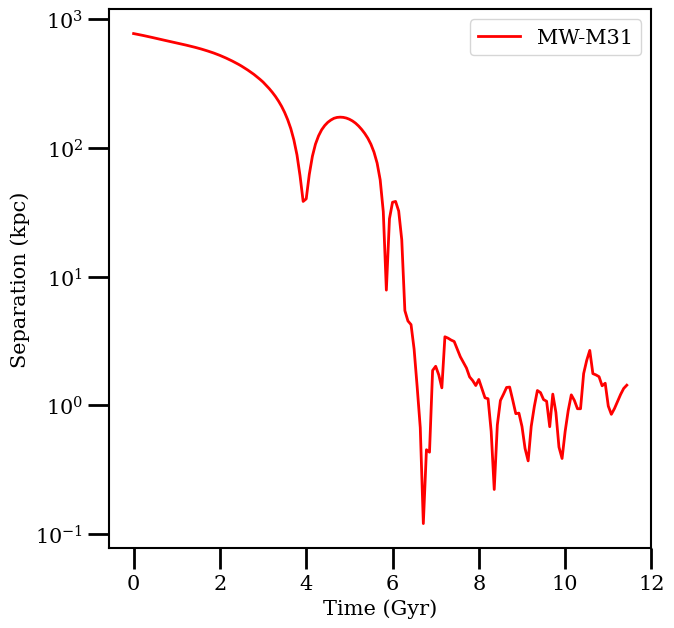

In [80]:
# Plot the Orbit of the galaxies 
#################################

# plot the seperation of MW and M31
plt.figure(figsize=(7,7))

plt.semilogy(MW["t"], rel_pos_MW_M31, label='MW-M31', color='red')

plt.xlabel('Time (Gyr)', fontsize=15)
plt.ylabel('Separation (kpc)', fontsize=15)

plt.legend(loc='upper right', fontsize=15)


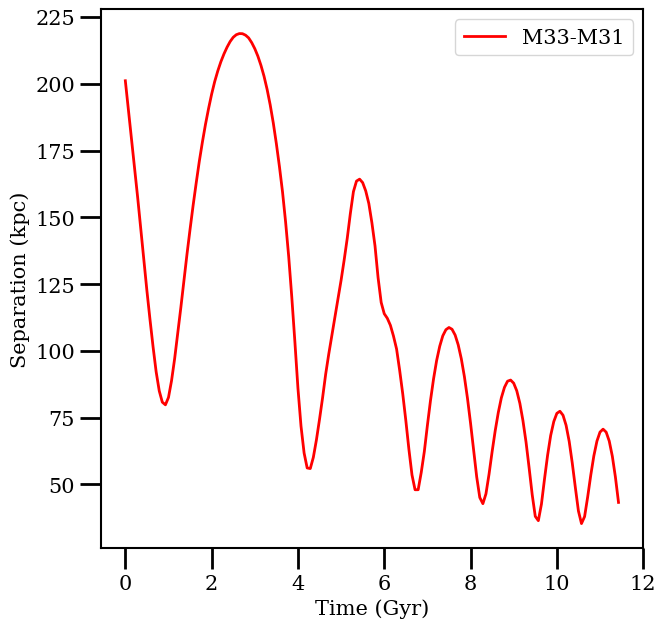

In [77]:
plt.figure(figsize=(7,7))
# plotting the relative position of M33 and M31
plt.plot(MW["t"], rel_pos_M33_M31, label='M33-M31', color='r')

plt.xlabel('Time (Gyr)', fontsize=15)
plt.ylabel('Separation (kpc)', fontsize=15)

plt.legend(loc='upper right', fontsize=15)




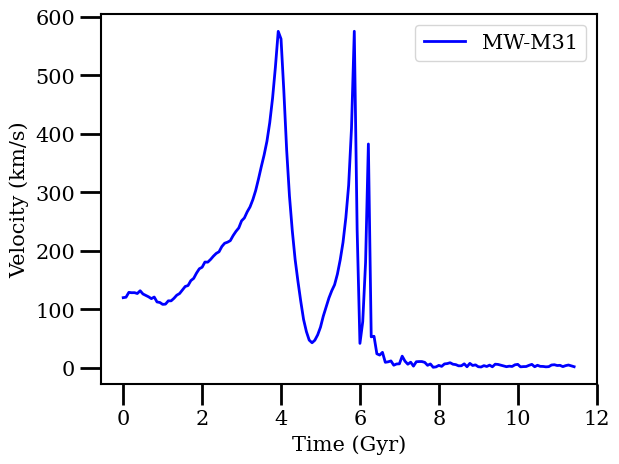

In [78]:
# Plot the orbital velocities of the galaxies 
#################################

# Plot the vel separation of MW and M31
plt.plot(MW["t"], rel_vel_MW_M31, label='MW-M31', color='blue')
plt.xlabel('Time (Gyr)', fontsize=15)
plt.ylabel('Velocity (km/s)', fontsize=15)
plt.legend(loc='upper right', fontsize=15)


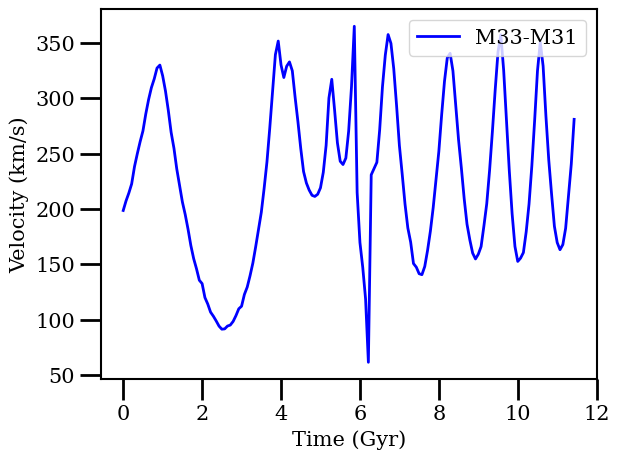

In [79]:

# Plot the vel separation of M33 and M31
plt.plot(MW["t"], rel_vel_M33_M31, label='M33-M31', color='blue')
plt.xlabel('Time (Gyr)', fontsize=15)
plt.ylabel('Velocity (km/s)', fontsize=15)
plt.legend(loc='upper right', fontsize=15)


How many close encounters will the MW and M31 experience in the future?

Answer: 3



2. How is the time evolution of the separation and relative velocity related?

Answer: Inversely, as the seperation decreases the relative velocity explodes. Makes sense as the two system will come close to each others gravitational potential well, there velocity will increase tremendously.


3. When do M31 and the MW merge? (you might need to zoom in on the plot - try a log
y axis). What happens to M33’s orbit when they merge?

Answer: After 8ish Gyr we can see that the seperation is oscillating about the same value. So maybe that is the time when the merger has started and things are starting to settling down.